In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import pandas as pd




In [80]:
import random


original_data =  pd.read_csv('TCGA_Labeled.csv');
original_data
genes =  original_data.columns[1:]
selected_genes = random.sample(list(genes), 20)
selected_genes

['RANBP3',
 'AC119674.2',
 'WASHC1',
 'MEIOB',
 'CHSY3',
 'ARFIP1',
 'RENBP',
 'MFF',
 'MDFIC2',
 'SRGAP2C',
 'FAHD2B',
 'EEF1B2',
 'RPL35',
 'SLC6A16',
 'ZSCAN5B',
 'LIPF',
 'OR4K17',
 'TYRO3',
 'SLC35F4',
 'COL20A1']

[[ 1.00000000e+00  6.38596888e-02  5.36295124e-01  2.18633158e-02
   2.86946275e-01  5.79539251e-01  3.46129802e-01  3.18124491e-01
  -4.82574889e-02  4.64037817e-01  3.63420792e-01  2.76486897e-01
   3.00874458e-01  2.47078882e-01  1.16268774e-01  1.08543272e-02
   6.55536367e-03  3.54642279e-01 -7.18702658e-03  8.81787662e-02]
 [ 6.38596888e-02  1.00000000e+00  9.38421936e-02  5.48699955e-02
   1.45508628e-01  1.97053224e-01  1.51055230e-01  1.15492603e-01
   1.92805054e-01  1.04200622e-01  5.38161324e-02 -1.38954008e-02
  -2.51398102e-02  8.64371671e-02 -6.34530291e-03 -4.48540429e-03
   2.49531359e-01  3.14391419e-02  7.79454828e-02  5.10477132e-02]
 [ 5.36295124e-01  9.38421936e-02  1.00000000e+00 -7.17574177e-04
   8.72359108e-02  2.80080946e-01  2.39910273e-01  2.36782894e-01
  -3.15665694e-02  1.73732952e-01  3.45998214e-01  1.70314421e-01
   2.58586031e-01  2.81281452e-01  8.29241038e-02 -2.05555544e-02
  -1.11987865e-02  2.13274375e-01 -3.98999247e-02  1.59511955e-01]
 [ 2.18

C:\Users\mrsm4\AppData\Local\Temp\ipykernel_3936\1523688865.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='average')


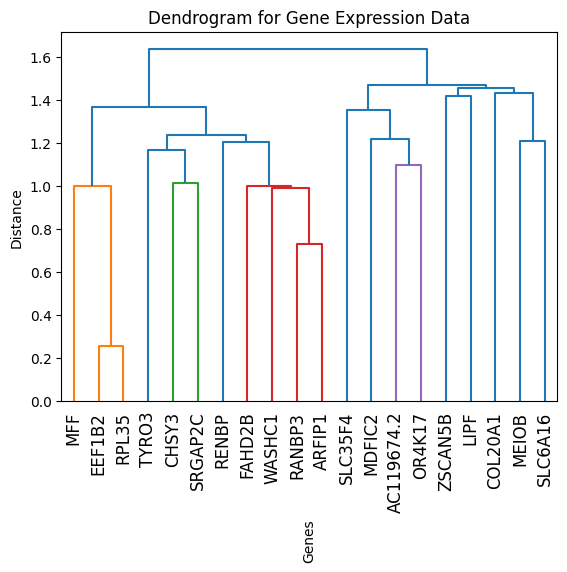

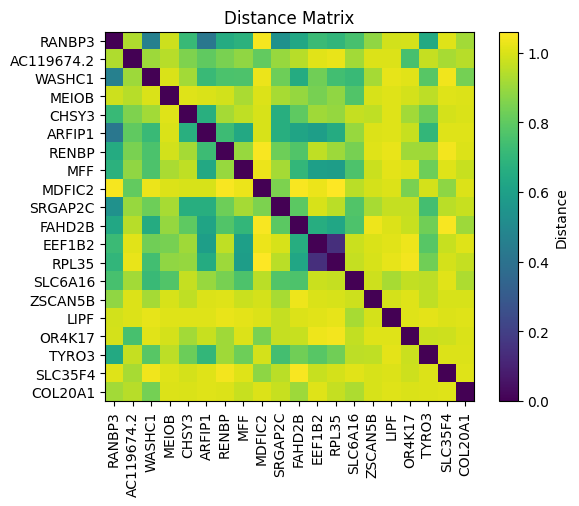

In [81]:

selected_data = original_data.loc[:, selected_genes]
selected_data = selected_data.T
selected_data = selected_data.values

correlation_matrix = np.corrcoef(selected_data)

print(correlation_matrix)
correlation_matrix = np.nan_to_num(correlation_matrix, nan=np.nanmean(correlation_matrix, axis=0))
distance_matrix = 1 - correlation_matrix
linkage_matrix = linkage(distance_matrix, method='average')
dendrogram(linkage_matrix, labels=selected_genes,orientation='top', leaf_rotation=90)
plt.title('Dendrogram for Gene Expression Data')
plt.xlabel('Genes', rotation = 90)
plt.ylabel('Distance')
plt.show()

plt.subplot(1, 1, 1)
plt.imshow(distance_matrix, cmap='viridis', origin='upper', interpolation='none')
plt.colorbar(label='Distance')
plt.title('Distance Matrix')
plt.xticks(range(len(selected_genes)),selected_genes, rotation=90)
plt.yticks(range(len(selected_genes)),selected_genes)
plt.show()

[[ 1.          0.44646869  0.77321087 -0.19492347  0.59613736  0.8190435
   0.3366348   0.11650828  0.03093621  0.62002208  0.72354201  0.40917545
   0.5576543   0.47412207 -0.40470367 -0.52894487 -0.16926725  0.64478402
  -0.12150844 -0.11124775]
 [ 0.44646869  1.          0.47034361 -0.13186504  0.43252021  0.56397921
   0.17273971  0.01971666  0.19029589  0.34259322  0.47593844  0.18527911
   0.2779659   0.29297729 -0.37137657 -0.44504898  0.03239188  0.38618719
  -0.03327398 -0.094773  ]
 [ 0.77321087  0.47034361  1.         -0.2163682   0.47754162  0.70468876
   0.23650867  0.06867614  0.02985356  0.4440422   0.71385011  0.35215519
   0.52452447  0.4687691  -0.42020295 -0.56135012 -0.20187127  0.57382314
  -0.14572121 -0.06426665]
 [-0.19492347 -0.13186504 -0.2163682   1.         -0.17950055 -0.24600303
  -0.01049542  0.11263193 -0.01482304 -0.07138489 -0.16900076  0.03598252
  -0.0586442   0.07416934  0.19886191  0.23328406  0.09527549 -0.15739502
   0.04215463  0.0672841 ]
 [ 0.

C:\Users\mrsm4\AppData\Local\Temp\ipykernel_3936\681398571.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='average')


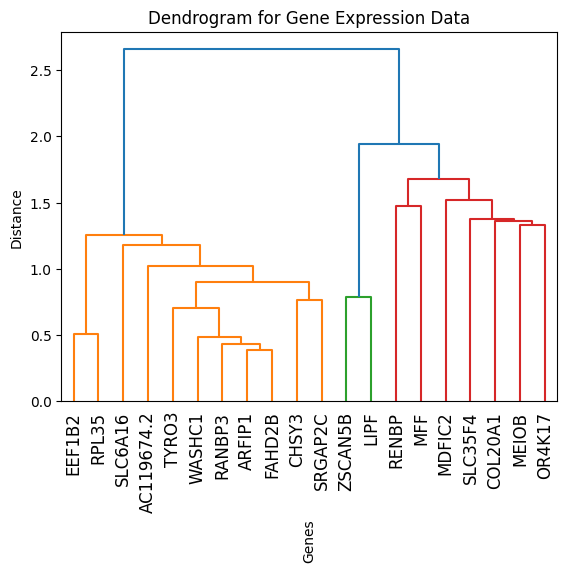

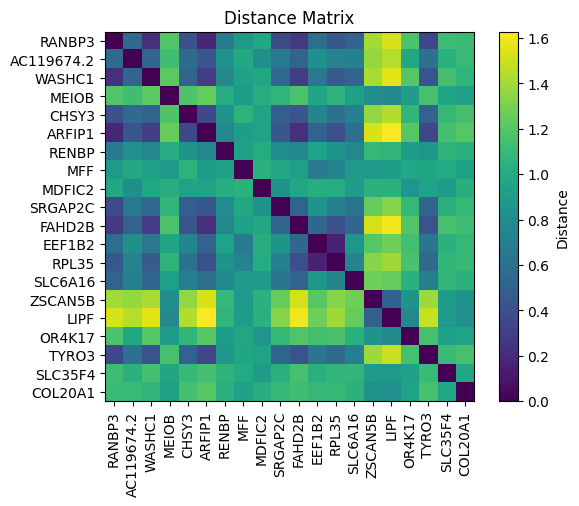

In [82]:
aug_data_1 = pd.read_csv('Augmented_Data_2.csv')
aug_data_1 = aug_data_1.loc[:, selected_genes]

selected_data = aug_data_1.T
selected_data = selected_data.values

correlation_matrix = np.corrcoef(selected_data)

print(correlation_matrix)
correlation_matrix = np.nan_to_num(correlation_matrix, nan=np.nanmean(correlation_matrix, axis=0))
distance_matrix = 1 - correlation_matrix
linkage_matrix = linkage(distance_matrix, method='average')
dendrogram(linkage_matrix, labels=selected_genes,orientation='top', leaf_rotation=90)
plt.title('Dendrogram for Gene Expression Data')
plt.xlabel('Genes', rotation = 90)
plt.ylabel('Distance')
plt.show()

plt.subplot(1, 1, 1)
plt.imshow(distance_matrix, cmap='viridis', origin='upper', interpolation='none')
plt.colorbar(label='Distance')
plt.title('Distance Matrix')
plt.xticks(range(len(selected_genes)),selected_genes, rotation=90)
plt.yticks(range(len(selected_genes)),selected_genes)
plt.show()

In [ ]:

selected_data = original_data.loc[:, selected_genes]
selected_data = selected_data.T
selected_data = selected_data.values

correlation_matrix = np.corrcoef(selected_data)

print(correlation_matrix)
correlation_matrix = np.nan_to_num(correlation_matrix, nan=np.nanmean(correlation_matrix, axis=0))
distance_matrix = 1 - correlation_matrix
linkage_matrix = linkage(distance_matrix, method='average')
dendrogram(linkage_matrix, labels=selected_genes,orientation='top', leaf_rotation=90)
plt.title('Dendrogram for Gene Expression Data')
plt.xlabel('Genes', rotation = 90)
plt.ylabel('Distance')
plt.show()

plt.subplot(1, 1, 1)
plt.imshow(distance_matrix, cmap='viridis', origin='upper', interpolation='none')
plt.colorbar(label='Distance')
plt.title('Distance Matrix')
plt.xticks(range(len(selected_genes)),selected_genes, rotation=90)
plt.yticks(range(len(selected_genes)),selected_genes)
plt.show()